# Text Summarization & Visualization


# @hidden_cell
# The following code contains the credentials for a file in your IBM Cloud Object Storage.
# You might want to remove those credentials before you share your notebook.
credentials_2 = {
    'IAM_SERVICE_ID': 'iam-ServiceId-6c7a92c2-811b-4d3c-a9ef-ab8875e37e12',
    'IBM_API_KEY_ID': '7RLlD6gaXG1G2e9pjE87z39_9dZjR55Ynuvzuy8iVbHs',
    'ENDPOINT': 'https://s3.eu-geo.objectstorage.service.networklayer.com',
    'IBM_AUTH_ENDPOINT': 'https://iam.eu-gb.bluemix.net/oidc/token',
    'BUCKET': 'testsummarization-donotdelete-pr-3fimlu2ztpitzq',
    'FILE': 'Mission_Impossible_6_Review.txt'
}
# @hidden_cell
# The following code contains the credentials for a file in your IBM Cloud Object Storage.
# You might want to remove those credentials before you share your notebook.
credentials_2 = {
    'IAM_SERVICE_ID': 'iam-ServiceId-6c7a92c2-811b-4d3c-a9ef-ab8875e37e12',
    'IBM_API_KEY_ID': '7RLlD6gaXG1G2e9pjE87z39_9dZjR55Ynuvzuy8iVbHs',
    'ENDPOINT': 'https://s3.eu-geo.objectstorage.service.networklayer.com',
    'IBM_AUTH_ENDPOINT': 'https://iam.eu-gb.bluemix.net/oidc/token',
    'BUCKET': 'testsummarization-donotdelete-pr-3fimlu2ztpitzq',
    'FILE': 'Mission_Impossible_6_Review.txt'
}
## Setup
To prepare your environment, you need to install some packages.

### Install the necessary packages

You need the latest versions of these packages:<br>

In [1]:
!pip install gensim

     |████████████████████████████████| 24.2MB 17.7MB/s eta 0:00:01
     |████████████████████████████████| 71kB 20.7MB/s eta 0:00:01
  Stored in directory: /home/dsxuser/.cache/pip/wheels/5f/ea/fb/5b1a947b369724063b2617011f1540c44eb00e28c3d2ca8692
Successfully built smart-open


In [2]:
!pip install watson-developer-cloud==1.5

     |████████████████████████████████| 225kB 17.2MB/s eta 0:00:01
     |████████████████████████████████| 778kB 24.3MB/s eta 0:00:01
     |████████████████████████████████| 3.1MB 41.7MB/s eta 0:00:01
     |████████████████████████████████| 2.3MB 38.4MB/s eta 0:00:01
     |████████████████████████████████| 174kB 40.1MB/s eta 0:00:01
     |████████████████████████████████| 61kB 23.1MB/s eta 0:00:01
     |████████████████████████████████| 102kB 28.1MB/s ta 0:00:01
     |████████████████████████████████| 81kB 26.9MB/s eta 0:00:01
  Stored in directory: /home/dsxuser/.cache/pip/wheels/81/cd/de/4e0916f623c2d125502e493394fd333ed693960264d4b7e524
Successfully built watson-developer-cloud
  Found existing installation: cryptography 2.5
    Uninstalling cryptography-2.5:
      Successfully uninstalled cryptography-2.5


In [3]:
!pip install pyldavis

     |████████████████████████████████| 1.6MB 14.3MB/s eta 0:00:01
     |████████████████████████████████| 286kB 39.0MB/s eta 0:00:01
  Stored in directory: /home/dsxuser/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
Successfully built pyldavis


In [4]:
!pip install wordcloud

     |████████████████████████████████| 368kB 34.7MB/s eta 0:00:01


In [5]:
from gensim.summarization.summarizer import summarize
from gensim.summarization import keywords
import watson_developer_cloud
import ibm_boto3
from botocore.client import Config
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import pyLDAvis
import pyLDAvis.gensim  
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import urllib
from bs4 import BeautifulSoup
import requests
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /home/dsxuser/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /home/dsxuser/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /home/dsxuser/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to
[nltk_data]    |     /home/dsxuser/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to
[nltk_data]    |     /home/dsxuser/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to
[nltk_data]    |     /home/dsxuser/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to
[nltk_data]    |     /home/ds

[nltk_data]    | Downloading package smultron to
[nltk_data]    |     /home/dsxuser/nltk_data...
[nltk_data]    |   Unzipping corpora/smultron.zip.
[nltk_data]    | Downloading package state_union to
[nltk_data]    |     /home/dsxuser/nltk_data...
[nltk_data]    |   Unzipping corpora/state_union.zip.
[nltk_data]    | Downloading package stopwords to
[nltk_data]    |     /home/dsxuser/nltk_data...
[nltk_data]    |   Unzipping corpora/stopwords.zip.
[nltk_data]    | Downloading package subjectivity to
[nltk_data]    |     /home/dsxuser/nltk_data...
[nltk_data]    |   Unzipping corpora/subjectivity.zip.
[nltk_data]    | Downloading package swadesh to
[nltk_data]    |     /home/dsxuser/nltk_data...
[nltk_data]    |   Unzipping corpora/swadesh.zip.
[nltk_data]    | Downloading package switchboard to
[nltk_data]    |     /home/dsxuser/nltk_data...
[nltk_data]    |   Unzipping corpora/switchboard.zip.
[nltk_data]    | Downloading package timit to
[nltk_data]    |     /home/dsxuser/nltk_data..

True

## 1. Summarization & keywords extraction

### 1a. Read the Data
Click on Insert to code and then select Insert Credentials as credentials_1

In [6]:

# @hidden_cell
# The following code contains the credentials for a file in your IBM Cloud Object Storage.
# You might want to remove those credentials before you share your notebook.
credentials_1 = {
    'IAM_SERVICE_ID': 'iam-ServiceId-6c7a92c2-811b-4d3c-a9ef-ab8875e37e12',
    'IBM_API_KEY_ID': '7RLlD6gaXG1G2e9pjE87z39_9dZjR55Ynuvzuy8iVbHs',
    'ENDPOINT': 'https://s3.eu-geo.objectstorage.service.networklayer.com',
    'IBM_AUTH_ENDPOINT': 'https://iam.eu-gb.bluemix.net/oidc/token',
    'BUCKET': 'testsummarization-donotdelete-pr-3fimlu2ztpitzq',
    'FILE': 'Mission_Impossible_6_Review.txt'
}


### 1b. Functions to extract files from Cloud Object Storage

In [7]:
cos = ibm_boto3.client('s3',
                    ibm_api_key_id=credentials_1['IBM_API_KEY_ID'],
                    ibm_service_instance_id=credentials_1['IAM_SERVICE_ID'],
                    ibm_auth_endpoint=credentials_1['IBM_AUTH_ENDPOINT'],
                    config=Config(signature_version='oauth'),
                    endpoint_url=credentials_1['ENDPOINT'])

def get_file(filename):
    '''Retrieve file from Cloud Object Storage'''
    fileobject = cos.get_object(Bucket=credentials_1['BUCKET'], Key=filename)['Body']
    return fileobject

def load_string(fileobject):
    '''Load the file contents into a Python string'''
    text = fileobject.read()
    return text

### 1c. Get File Contents

In [8]:
text=str(load_string(get_file("Mission_Impossible_6_Review.txt")))

### 1d. Helper functions to extract summary and keywords

In [9]:
'''Get the summary of the text'''

def get_summary(text, pct):
    summary = summarize(text,ratio=pct,split=True)
    return summary

'''Get the keywords of the text'''

def get_keywords(text):
    res = keywords(text, ratio=0.1, words=None, split=False, scores=False, pos_filter=('NN', 'JJ'), lemmatize=False, deacc=False)
    res = res.split('\n')
    return res

'''Tokenize the sentence into words & remove punctuation'''

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
        
def split_sentences(text):
    """ Split text into sentences.
    """
    sentence_delimiters = re.compile(u'[\\[\\]\n.!?]')
    sentences = sentence_delimiters.split(text)
    return sentences

def split_into_tokens(text):
    """ Split text into tokens.
    """
    tokens = nltk.word_tokenize(text)
    return tokens
    
def POS_tagging(text):
    """ Generate Part of speech tagging of the text.
    """
    POSofText = nltk.tag.pos_tag(text)
    return POSofText

def extract_title_text(url):
    page = urllib.request.urlopen(url).read().decode('utf8')
    soup = BeautifulSoup(page,'lxml')
    text = ' '.join(map(lambda p: p.text, soup.find_all('p')))
    return soup.title.text, text

In [10]:
print('Printing Summary')
print('--------------------------')
print(get_summary(text, 0.3))
print ('-------------------------')
print('Printing Keywords')
print('--------------------------')
print(get_keywords(text))

Printing Summary
--------------------------
["The shot is in the movie and it will make you wince because you know the context, but otherwise you don't really notice any difference as the stunt in question is just the latest in a long line of deathdefying activities featuring Cruise.What makes more of an impact on the sixth movie in the series is its connection to the previous movie, Rogue Nation, with the return of the villainous Solomon Lane (played creepily again by Sean Harris) and his nefarious Syndicate, who are again threatening the world.With the addition of Ethan Hunt's former wife Julia (Michelle Monaghan) from the third movie, Fallout is immediately given more depth than previous outings and the stakes feel higher, with Ethan Hunt (Cruise) haunted by his past mistakes.", "At times, even IMAX doesn't feel big enough to contain it.Putting aside the direct connection to the previous movie and the series' first returning director in Christopher McQuarrie, it's pretty much busine

## 2. Visualization

### 2a. Remove punctuation & special characters

In [11]:
import re
my_new_text = re.sub('[^ a-zA-Z0-9]', '', text)

### 2b. Preprocess the text for next steps

In [12]:
stop_words = set(stopwords.words('english'))
lemma = WordNetLemmatizer()
word_tokens = word_tokenize(str(my_new_text)) 
filtered_sentence = [w for w in word_tokens if not w in stop_words]
normalized = " ".join(lemma.lemmatize(word) for word in filtered_sentence)

### 2c. Create n grams where n is the number of words

In [13]:
from nltk import ngrams
n = 7
total_grams = []
number_of_grams = ngrams(normalized.split(), n)
for grams in number_of_grams:
    total_grams.append(grams)

In [14]:
print(total_grams[:10])

[('bBefore', 'release', 'Mission', 'Impossible', 'Fallout', 'known', 'two'), ('release', 'Mission', 'Impossible', 'Fallout', 'known', 'two', 'thing'), ('Mission', 'Impossible', 'Fallout', 'known', 'two', 'thing', 'fact'), ('Impossible', 'Fallout', 'known', 'two', 'thing', 'fact', 'first'), ('Fallout', 'known', 'two', 'thing', 'fact', 'first', 'direct'), ('known', 'two', 'thing', 'fact', 'first', 'direct', 'sequel'), ('two', 'thing', 'fact', 'first', 'direct', 'sequel', 'series'), ('thing', 'fact', 'first', 'direct', 'sequel', 'series', 'THAT'), ('fact', 'first', 'direct', 'sequel', 'series', 'THAT', 'injury'), ('first', 'direct', 'sequel', 'series', 'THAT', 'injury', 'Tom')]


### 2d. Create the wordcloud visualization on the processed data
To highlight important textual data points & convey crucial information. The more a specific word appears in a source of textual data, the bigger and bolder it appears in the word cloud.

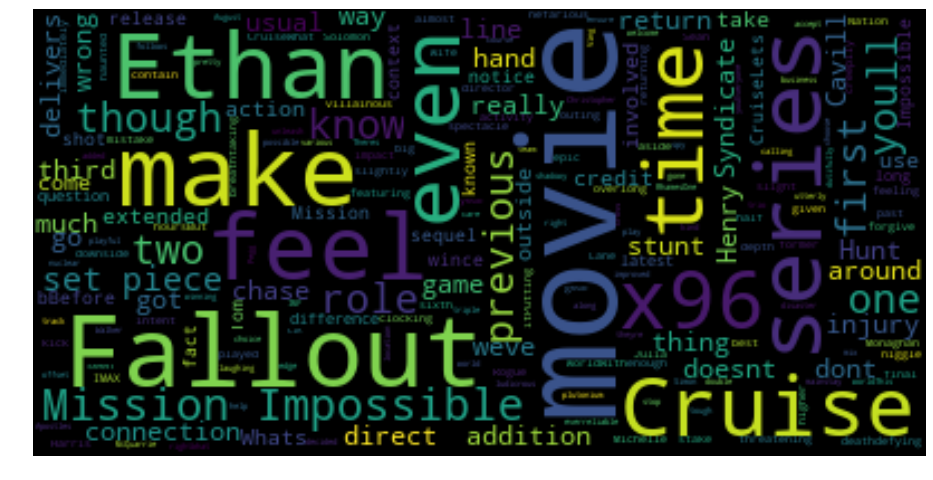

In [15]:
from wordcloud import WordCloud
wordcloud = WordCloud(max_font_size=60).generate(normalized)
plt.figure(figsize=(16,12))

'''plot wordcloud in matplotlib'''

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### 2e. Analyze the frequency of words in the text. 

In [16]:
count = {}
for w in normalized.split():
    if w in count:
        count[w] += 1
    else:
        count[w] = 1
for word, times in count.items():
    if times > 3:
        print("%s was found %d times" % (word, times))

Mission was found 4 times
Impossible was found 4 times
Fallout was found 6 times
series was found 5 times
get was found 4 times
movie was found 12 times
make was found 6 times
Ethan was found 4 times
feel was found 5 times
Cruise was found 4 times
time was found 4 times
even was found 4 times
x96 was found 4 times


### 2f. Create a Dispersion plot
The motivation behind using the Lexical Dispersion Plots was to give us an alternative means of visualising how prevalent  these words are in the text corpus, whether or not there was a clustering pattern that is whether or not a word featured heavily at certain point of the text corpus.

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


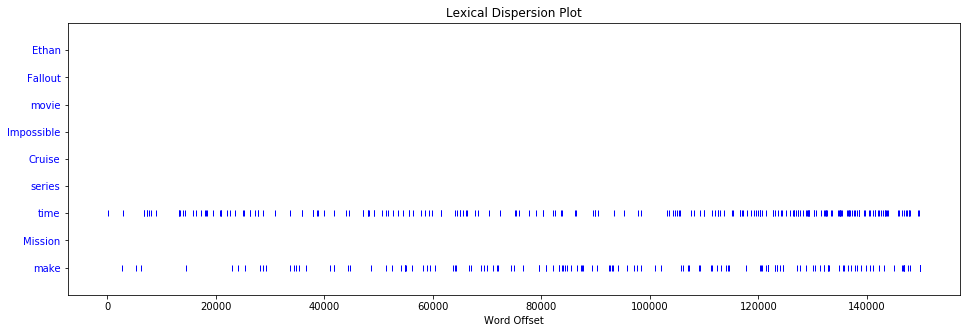

In [17]:
from nltk.book import text4 as content
plt.figure(figsize=(16,5))
topics = ['Ethan', 'Fallout','movie', 'Impossible', 'Cruise', 'series', 'time', 'Mission', 'make']
content.dispersion_plot(topics)

## 3. Topic Modelling

### 3a. Start the preprocessing for Topic Modelling

Topic Modelling is an approach for finding topics in large amounts of text. Topic modeling is great for document clustering, information retrieval from unstructured text, and feature selection.
 
Topic Modeling with Latent Dirichlet Allocation technique.

Why Latent Dirichlet Allocation? This technique can create model which can be generalized easily on any new text corpus and help us in identifying the important topics from the corpus. 

Some of the advantages are :

Training documents may come in sequentially, no random access required.

Runs in constant memory w.r.t. the number of documents: size of the training corpus does not affect memory footprint, can process corpora larger than RAM.

Is distributed & makes use of a cluster of machines, if available, to speed up model estimation.

In [18]:
import gensim
from gensim import corpora

tokenized_sents = list(sent_to_words(filtered_sentence))

# Creating the term dictionary of our corpus, where every unique term is assigned an index. 
dictionary = corpora.Dictionary(tokenized_sents)

# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in tokenized_sents]

### 3b. Creating the object for LDA model & train the model

In [19]:
Lda = gensim.models.ldamodel.LdaModel

# Running and Training LDA model on the document term matrix by selecting minimum parameters required.
ldamodel = Lda(doc_term_matrix, num_topics=2, id2word = dictionary, passes=100)

### 3c. Extract two topics with twenty words in each topic

In [20]:
print(ldamodel.print_topics(num_topics=2, num_words=20))

[(0, '0.024*"movie" + 0.016*"fallout" + 0.014*"series" + 0.011*"makes" + 0.011*"feel" + 0.011*"get" + 0.011*"theres" + 0.009*"movies" + 0.009*"though" + 0.009*"role" + 0.006*"extended" + 0.006*"delivers" + 0.006*"its" + 0.006*"way" + 0.006*"dont" + 0.006*"come" + 0.006*"line" + 0.006*"syndicate" + 0.006*"cavill" + 0.006*"direct"'), (1, '0.014*"mission" + 0.014*"impossible" + 0.012*"even" + 0.012*"ethan" + 0.012*"cruise" + 0.009*"two" + 0.009*"one" + 0.009*"previous" + 0.009*"like" + 0.009*"set" + 0.009*"youll" + 0.009*"first" + 0.006*"doesnt" + 0.006*"much" + 0.006*"around" + 0.006*"addition" + 0.006*"connection" + 0.006*"henry" + 0.006*"weve" + 0.006*"make"')]


### 3d. Model perplexity and topic coherence provide a convenient measure to judge how good a given topic model is. 

In [21]:
'''Compute Perplexity'''

# a measure of how good the model is. lower the better.

print('\nPerplexity: ', ldamodel.log_perplexity(doc_term_matrix))

'''Compute Coherence Score'''

coherence_model_lda = CoherenceModel(model=ldamodel, texts=tokenized_sents, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -6.642827859763195

Coherence Score:  0.8622234544104683


#### Coherence score is 'higher the better' metric and given the score of 0.86 we can be assured that we have selected the right number of topics for this corpus.

In [22]:
'''Visualize the topics'''
# pyLDAvis tool to visualize the fit of our LDA model across topics and their top words. 
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel, doc_term_matrix, dictionary)
vis

PreparedData(topic_coordinates=              x    y  topics  cluster       Freq
topic                                           
0      0.084269  0.0       1        1  50.740520
1     -0.084269  0.0       2        1  49.259476, topic_info=    Category      Freq           Term     Total  loglift  logprob
21   Default  5.000000          movie  5.000000  30.0000  30.0000
4    Default  3.000000        fallout  3.000000  29.0000  29.0000
2    Default  3.000000        mission  3.000000  28.0000  28.0000
3    Default  3.000000     impossible  3.000000  27.0000  27.0000
12   Default  3.000000         series  3.000000  26.0000  26.0000
108  Default  2.000000           even  2.000000  25.0000  25.0000
76   Default  2.000000         cruise  2.000000  24.0000  24.0000
60   Default  2.000000          ethan  2.000000  23.0000  23.0000
73   Default  2.000000           feel  2.000000  22.0000  22.0000
40   Default  2.000000          makes  2.000000  21.0000  21.0000
17   Default  2.000000            get  2.000000  20.0000  20.0000
158  Default  2.000000         theres  2.000000  19.0000  19.0000
174  Default  2.000000            set  2.000000  18.0000  18.0000
6    Default  2.000000            two  2.000000  17.0000  17.0000
44   Default  2.000000       previous  2.000000  16.0000  16.0000
157  Default  2.000000            one  2.000000  15.0000  15.0000
96   Default  2.000000          youll  2.000000  14.0000  14.0000
256  Default  2.000000           like  2.000000  13.0000  13.0000
9    Default  2.000000          first  2.000000  12.0000  12.0000
213  Default  2.000000         movies  2.000000  11.0000  11.0000
197  Default  2.000000           role  2.000000  10.0000  10.0000
142  Default  2.000000         though  2.000000   9.0000   9.0000
254  Default  1.000000          whats  1.000000   8.0000   8.0000
103  Default  1.000000           weve  1.000000   7.0000   7.0000
161  Default  1.000000          wrong  1.000000   6.0000   6.0000
43   Default  1.000000     connection  1.000000   5.0000   5.0000
193  Default  1.000000       involved  1.000000   4.0000   4.0000
150  Default  1.000000          henry  1.000000   3.0000   3.0000
22   Default  1.000000           make  1.000000   2.0000   2.0000
121  Default  1.000000           much  1.000000   1.0000   1.0000
..       ...       ...            ...       ...      ...      ...
96    Topic2  1.972814          youll  2.267143   0.5690  -4.7038
256   Topic2  1.972814           like  2.267143   0.5690  -4.7038
157   Topic2  1.972814            one  2.267143   0.5690  -4.7038
44    Topic2  1.972814       previous  2.267143   0.5690  -4.7038
174   Topic2  1.972814            set  2.267143   0.5690  -4.7038
9     Topic2  1.972814          first  2.267143   0.5690  -4.7038
254   Topic2  1.405522          whats  1.700058   0.5178  -5.0428
110   Topic2  1.405522         doesnt  1.700059   0.5178  -5.0428
150   Topic2  1.405522          henry  1.700059   0.5178  -5.0428
43    Topic2  1.405522     connection  1.700059   0.5178  -5.0428
186   Topic2  1.405522          knows  1.700059   0.5178  -5.0428
193   Topic2  1.405522       involved  1.700059   0.5178  -5.0428
161   Topic2  1.405522          wrong  1.700059   0.5178  -5.0428
59    Topic2  1.405522       addition  1.700059   0.5178  -5.0428
121   Topic2  1.405522           much  1.700059   0.5178  -5.0428
198   Topic2  1.405522        outside  1.700058   0.5178  -5.0428
141   Topic2  1.405522         around  1.700058   0.5178  -5.0428
224   Topic2  1.405522            use  1.700059   0.5178  -5.0428
103   Topic2  1.405522           weve  1.700059   0.5178  -5.0428
22    Topic2  1.405522           make  1.700059   0.5178  -5.0428
67    Topic2  1.405522          third  1.700059   0.5178  -5.0428
28    Topic2  1.405522         really  1.700059   0.5178  -5.0428
236   Topic2  0.837920   underusedbut  1.132973   0.4064  -5.5601
5     Topic2  0.837920          known  1.132973   0.4064  -5.5601
221   Topic2  0.837919      newcomers  1.132973   0.4064  -5.5601

#### We can observe that our LDA model has captured the prominent keywords under two topics in the text corpus which will give us a good understanding of what the text corpus is about. We can do further analysis by using this information to generate recommendations & classify the text for user profiling or push notifications. 

## In the next section, we will see how we can summarize and visualize news article!

### 1. Summarization & keywords extraction

In [23]:
'''Extract the first article of the news feed'''

url = urllib.request.urlopen('http://feeds.bbci.co.uk/news/rss.xml').read()
feed = BeautifulSoup(url.decode('utf8'),'lxml')
urls_to_summarize = list(map(lambda p: p.text, feed.find_all('guid')))
for article_url in urls_to_summarize[:1]:
    title, text = extract_title_text(article_url)
    print ('-------------------------------------------------------------------------------------------------------------------')
    print('Printing title & text')
    print('-----------------------')
    print (title, text)
    print ('-------------------------------------------------------------------------------------------------------------------')
    print('Printing title & summary')
    print('--------------------------')
    print (title)
    for s in get_summary(text, 0.2):
        print((s))
    print ('-------------------------------------------------------------------------------------------------------------------')
    print('Printing Keywords')
    print('--------------------------')
    for i in get_keywords(text):
        print((i))

-------------------------------------------------------------------------------------------------------------------
Printing title & text
-----------------------
Boris Johnson referred to police watchdog over US businesswoman links - BBC News  Share this with Email Facebook Messenger Messenger Twitter Pinterest WhatsApp LinkedIn Copy this link These are external links and will open in a new window The police watchdog is to decide whether or not to investigate Boris Johnson for a potential criminal offence of misconduct in public office while he was London mayor. It is alleged businesswoman Jennifer Arcuri received favourable treatment due to her friendship with Mr Johnson. The prime minister was referred by the Greater London Authority on Friday. Mr Johnson has denied any impropriety, while a government source described the referral as "politically motivated". The allegations regarding Mr Johnson's friendship with technology entrepreneur Ms Arcuri first emerged last weekend in the Sund

In [24]:
_title = []
_text = []
_summarized_text = []

for article_url in urls_to_summarize[:1]:
    title, text = extract_title_text(article_url)
    new_text = get_summary(text, 0.3)
    _title.append(title), _text.append(text), _summarized_text.append(new_text)

In [25]:
article_text = _text[0]
stop_words = set(stopwords.words('english'))
lemma = WordNetLemmatizer()
word_tokens = word_tokenize(str(article_text)) 
filtered_sentence = [w for w in word_tokens if not w in stop_words]
normalized = " ".join(lemma.lemmatize(word) for word in filtered_sentence)

### 2. Visualization

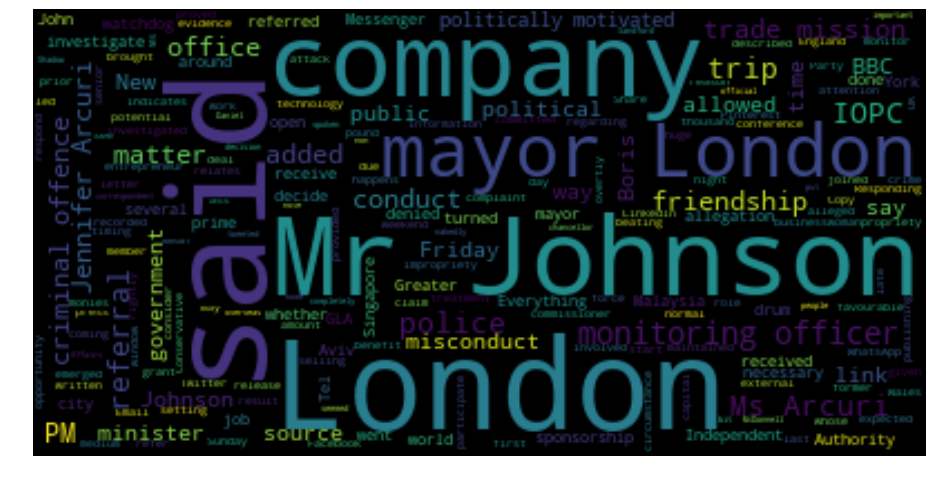

In [26]:
from wordcloud import WordCloud
wordcloud = WordCloud(max_font_size=60).generate(normalized)
plt.figure(figsize=(16,12))

'''plot wordcloud in matplotlib'''

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

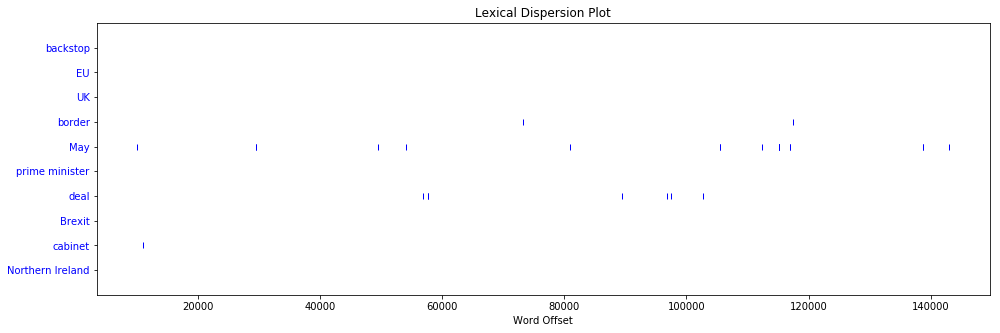

In [27]:
from nltk.book import text4 as content
plt.figure(figsize=(16,5))
topics = ['backstop', 'EU','UK', 'border', 'May', 'prime minister', 'deal', 'Brexit', 'cabinet', 'Northern Ireland']
content.dispersion_plot(topics)

We can observe that 'May' is being discussed throughout the article along with references to border, deal & cabinet. 

### 3. Create Topic Model

In [28]:
tokenized_sents = list(sent_to_words(filtered_sentence))

# Creating the term dictionary of our corpus, where every unique term is assigned an index. 
dictionary = corpora.Dictionary(tokenized_sents)

# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in tokenized_sents]

In [29]:
# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel

# Running and Training LDA model on the document term matrix.
ldamodel = Lda(doc_term_matrix, num_topics=2, id2word = dictionary, passes=100)

# Print the model output
print(ldamodel.print_topics(num_topics=2, num_words=20))

[(0, '0.030*"the" + 0.023*"arcuri" + 0.020*"mayor" + 0.016*"ms" + 0.016*"officer" + 0.016*"monitoring" + 0.013*"iopc" + 0.013*"referral" + 0.013*"police" + 0.011*"jennifer" + 0.011*"matter" + 0.011*"trip" + 0.011*"it" + 0.011*"conduct" + 0.011*"offence" + 0.011*"criminal" + 0.008*"bbc" + 0.008*"government" + 0.008*"way" + 0.008*"missions"'), (1, '0.035*"london" + 0.027*"johnson" + 0.022*"said" + 0.019*"mr" + 0.011*"friendship" + 0.011*"office" + 0.011*"trade" + 0.011*"pm" + 0.011*"added" + 0.009*"but" + 0.009*"public" + 0.009*"no" + 0.009*"misconduct" + 0.009*"new" + 0.009*"motivated" + 0.009*"boris" + 0.009*"politically" + 0.009*"allowed" + 0.009*"friday" + 0.006*"gla"')]


Run the below cell only if need to save the model, else omit this cell and proceed to the next cell.

In [32]:
#######'''Save the model'''
###
###from gensim.test.utils import datapath
#temp_file = datapath("/home/dsxuser/")
#ldamodel.save(temp_file)

#'''Load the model'''

#ldamodel = LdaModel.load(temp_file)

#'''Update the model on new and unseen data'''

##ldamodel.update(new_data)

In [33]:
'''Compute Perplexity'''

# a measure of how good the model is. Lower the better.
print('\nPerplexity: ', ldamodel.log_perplexity(doc_term_matrix))

'''Compute Coherence Score'''

coherence_model_lda = CoherenceModel(model=ldamodel, texts=tokenized_sents, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -6.287991263683386

Coherence Score:  0.8618837460440872


### 4. Visualize the topics from the model

pyLDAvis is designed to help users interpret the topics in a topic model that has been fit to a corpus of text data. The package extracts information from a fitted LDA topic model to inform an interactive web-based visualization.

In [34]:
'''Visualize the topics'''
# pyLDAvis tool to visualize the fit of our LDA model across topics and their top words. 
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel, doc_term_matrix, dictionary)
vis

PreparedData(topic_coordinates=              x    y  topics  cluster       Freq
topic                                           
0      0.110145  0.0       1        1  51.189186
1     -0.110145  0.0       2        1  48.810814, topic_info=    Category      Freq         Term     Total  loglift  logprob
30   Default  8.000000       london  8.000000  30.0000  30.0000
16   Default  8.000000          the  8.000000  29.0000  29.0000
23   Default  6.000000      johnson  6.000000  28.0000  28.0000
36   Default  6.000000       arcuri  6.000000  27.0000  27.0000
88   Default  5.000000         said  5.000000  26.0000  26.0000
31   Default  5.000000        mayor  5.000000  25.0000  25.0000
42   Default  5.000000           mr  5.000000  24.0000  24.0000
82   Default  4.000000      officer  4.000000  23.0000  23.0000
81   Default  4.000000   monitoring  4.000000  22.0000  22.0000
61   Default  4.000000           ms  4.000000  21.0000  21.0000
54   Default  3.000000     referral  3.000000  20.0000  20.0000
91   Default  3.000000         iopc  3.000000  19.0000  19.0000
17   Default  3.000000       police  3.000000  18.0000  18.0000
29   Default  3.000000       office  3.000000  17.0000  17.0000
41   Default  3.000000   friendship  3.000000  16.0000  16.0000
92   Default  3.000000           pm  3.000000  15.0000  15.0000
72   Default  3.000000        trade  3.000000  14.0000  14.0000
96   Default  3.000000        added  3.000000  13.0000  13.0000
98   Default  3.000000       matter  3.000000  12.0000  12.0000
225  Default  3.000000         trip  3.000000  11.0000  11.0000
35   Default  3.000000     jennifer  3.000000  10.0000  10.0000
25   Default  3.000000     criminal  3.000000   9.0000   9.0000
32   Default  3.000000           it  3.000000   8.0000   8.0000
26   Default  3.000000      offence  3.000000   7.0000   7.0000
86   Default  3.000000      conduct  3.000000   6.0000   6.0000
144  Default  2.000000           no  2.000000   5.0000   5.0000
28   Default  2.000000       public  2.000000   4.0000   4.0000
104  Default  2.000000          but  2.000000   3.0000   3.0000
27   Default  2.000000   misconduct  2.000000   2.0000   2.0000
55   Default  2.000000  politically  2.000000   1.0000   1.0000
..       ...       ...          ...       ...      ...      ...
27    Topic2  2.190338   misconduct  2.514047   0.5794  -4.7193
104   Topic2  2.190338          but  2.514047   0.5794  -4.7193
28    Topic2  2.190338       public  2.514048   0.5794  -4.7193
22    Topic2  2.190338        boris  2.514047   0.5794  -4.7193
48    Topic2  2.190337       friday  2.514047   0.5794  -4.7193
55    Topic2  2.190338  politically  2.514047   0.5794  -4.7193
56    Topic2  2.190338    motivated  2.514047   0.5794  -4.7193
14    Topic2  2.190338          new  2.514047   0.5794  -4.7193
133   Topic2  2.190338      allowed  2.514047   0.5794  -4.7193
144   Topic2  2.190338           no  2.514048   0.5794  -4.7193
208   Topic2  1.560626         went  1.884547   0.5286  -5.0583
151   Topic2  1.560626       around  1.884547   0.5286  -5.0583
3     Topic2  1.560626    messenger  1.884547   0.5286  -5.0583
37    Topic2  1.560626     received  1.884547   0.5286  -5.0583
135   Topic2  1.560626      receive  1.884547   0.5286  -5.0583
114   Topic2  1.560626         also  1.884547   0.5286  -5.0583
45    Topic2  1.560626     referred  1.884547   0.5286  -5.0583
46    Topic2  1.560626      greater  1.884547   0.5286  -5.0583
108   Topic2  1.560626          gla  1.884547   0.5286  -5.0583
20    Topic2  1.560626      whether  1.884547   0.5286  -5.0583
157   Topic2  1.560626         done  1.884547   0.5286  -5.0583
12    Topic2  1.560626        links  1.884547   0.5286  -5.0583
127   Topic2  1.560626         time  1.884547   0.5286  -5.0583
214   Topic2  1.560625         aviv  1.884547   0.5286  -5.0583
19    Topic2  1.560626       decide  1.884547   0.5286  -5.0583
18    Topic2  1.560626     watchdog  1.884547   0.5286  -5.0583
212   Topic2  1.560626         york  1.884547   0

### We have seen how to summarize & visualize a document as well as a news article to get quick information about the data. This methodology can be applied to lot of usecases to extract insights from unstructured data.